In [ ]:
%matplotlib inline

# Importing libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
#import os,sys
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
datapath = '../input'

In [ ]:
my_data = pd.read_csv('dataset.csv')
my_data.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","Personal_Loan","SecuritiesAccount","CDAccount","Online","CreditCard"]

In [ ]:
my_data.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [ ]:
# shape of data
my_data.shape


(10, 14)

In [ ]:
my_data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
# data type of each attribut
my_data.dtypes

ID                     int64
Age                    int64
Experience             int64
Income                 int64
ZIPCode                int64
Family                 int64
CCAvg                float64
Education              int64
Mortgage               int64
Personal_Loan          int64
SecuritiesAccount      int64
CDAccount              int64
Online                 int64
CreditCard             int64
dtype: object

In [ ]:
# Check for the null values
#null values
my_data.isnull().values.any()

False

In [ ]:
#  Checking the presence of missing values
val=my_data.isnull().values.any()

if val==True:
    print("Missing values present : ", my_data.isnull().values.sum())
    my_data=my_data.dropna()
else:
    print("No missing values present")

No missing values present


In [ ]:
# 5 point summary of numerical attributes
my_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10.0,5.50,3.027650,1.0,3.25,5.50,7.750,10.0
Age,10.0,38.80,8.337332,25.0,35.00,36.00,43.500,53.0
Experience,10.0,13.50,7.919736,1.0,9.00,11.50,18.000,27.0
Income,10.0,62.30,49.844313,11.0,30.25,47.00,78.750,180.0
ZIPCode,10.0,92224.50,1660.825514,90089.0,91162.75,91916.00,93713.000,94720.0
Family,10.0,2.40,1.349897,1.0,1.00,2.50,3.750,4.0
CCAvg,10.0,1.95,2.541762,0.3,0.70,1.25,1.575,8.9
Education,10.0,1.90,0.737865,1.0,1.25,2.00,2.000,3.0
Mortgage,10.0,25.90,55.909550,0.0,0.00,0.00,0.000,155.0
Personal_Loan,10.0,0.10,0.316228,0.0,0.00,0.00,0.000,1.0


In [ ]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 10 non-null     int64  
 1   Age                10 non-null     int64  
 2   Experience         10 non-null     int64  
 3   Income             10 non-null     int64  
 4   ZIPCode            10 non-null     int64  
 5   Family             10 non-null     int64  
 6   CCAvg              10 non-null     float64
 7   Education          10 non-null     int64  
 8   Mortgage           10 non-null     int64  
 9   Personal_Loan      10 non-null     int64  
 10  SecuritiesAccount  10 non-null     int64  
 11  CDAccount          10 non-null     int64  
 12  Online             10 non-null     int64  
 13  CreditCard         10 non-null     int64  
dtypes: float64(1), int64(13)
memory usage: 1.2 KB


In [ ]:
# Finding unique data
my_data.apply(lambda x: len(x.unique()))

ID                   10
Age                   8
Experience            9
Income               10
ZIPCode               9
Family                4
CCAvg                 8
Education             3
Mortgage              3
Personal_Loan         2
SecuritiesAccount     2
CDAccount             1
Online                2
CreditCard            2
dtype: int64

In [ ]:
#Find Shape
my_data.shape

(10, 14)

In [ ]:
#Find Mean
my_data.mean()

ID                       5.50
Age                     38.80
Experience              13.50
Income                  62.30
ZIPCode              92224.50
Family                   2.40
CCAvg                    1.95
Education                1.90
Mortgage                25.90
Personal_Loan            0.10
SecuritiesAccount        0.20
CDAccount                0.00
Online                   0.30
CreditCard               0.20
dtype: float64

In [ ]:
#Find Median
my_data.median()

ID                       5.50
Age                     36.00
Experience              11.50
Income                  47.00
ZIPCode              91916.00
Family                   2.50
CCAvg                    1.25
Education                2.00
Mortgage                 0.00
Personal_Loan            0.00
SecuritiesAccount        0.00
CDAccount                0.00
Online                   0.00
CreditCard               0.00
dtype: float64

In [ ]:
#Find Standard Deviation
my_data.std()

ID                      3.027650
Age                     8.337332
Experience              7.919736
Income                 49.844313
ZIPCode              1660.825514
Family                  1.349897
CCAvg                   2.541762
Education               0.737865
Mortgage               55.909550
Personal_Loan           0.316228
SecuritiesAccount       0.421637
CDAccount               0.000000
Online                  0.483046
CreditCard              0.421637
dtype: float64

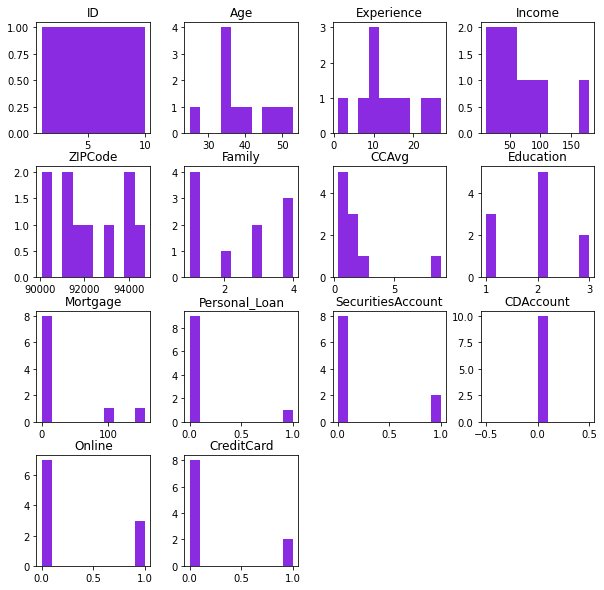

In [ ]:
#Ploting histogram to check that if data columns are normal or almost normal or not
my_data.hist(figsize=(10,10),color="blueviolet",grid=False)
plt.show()

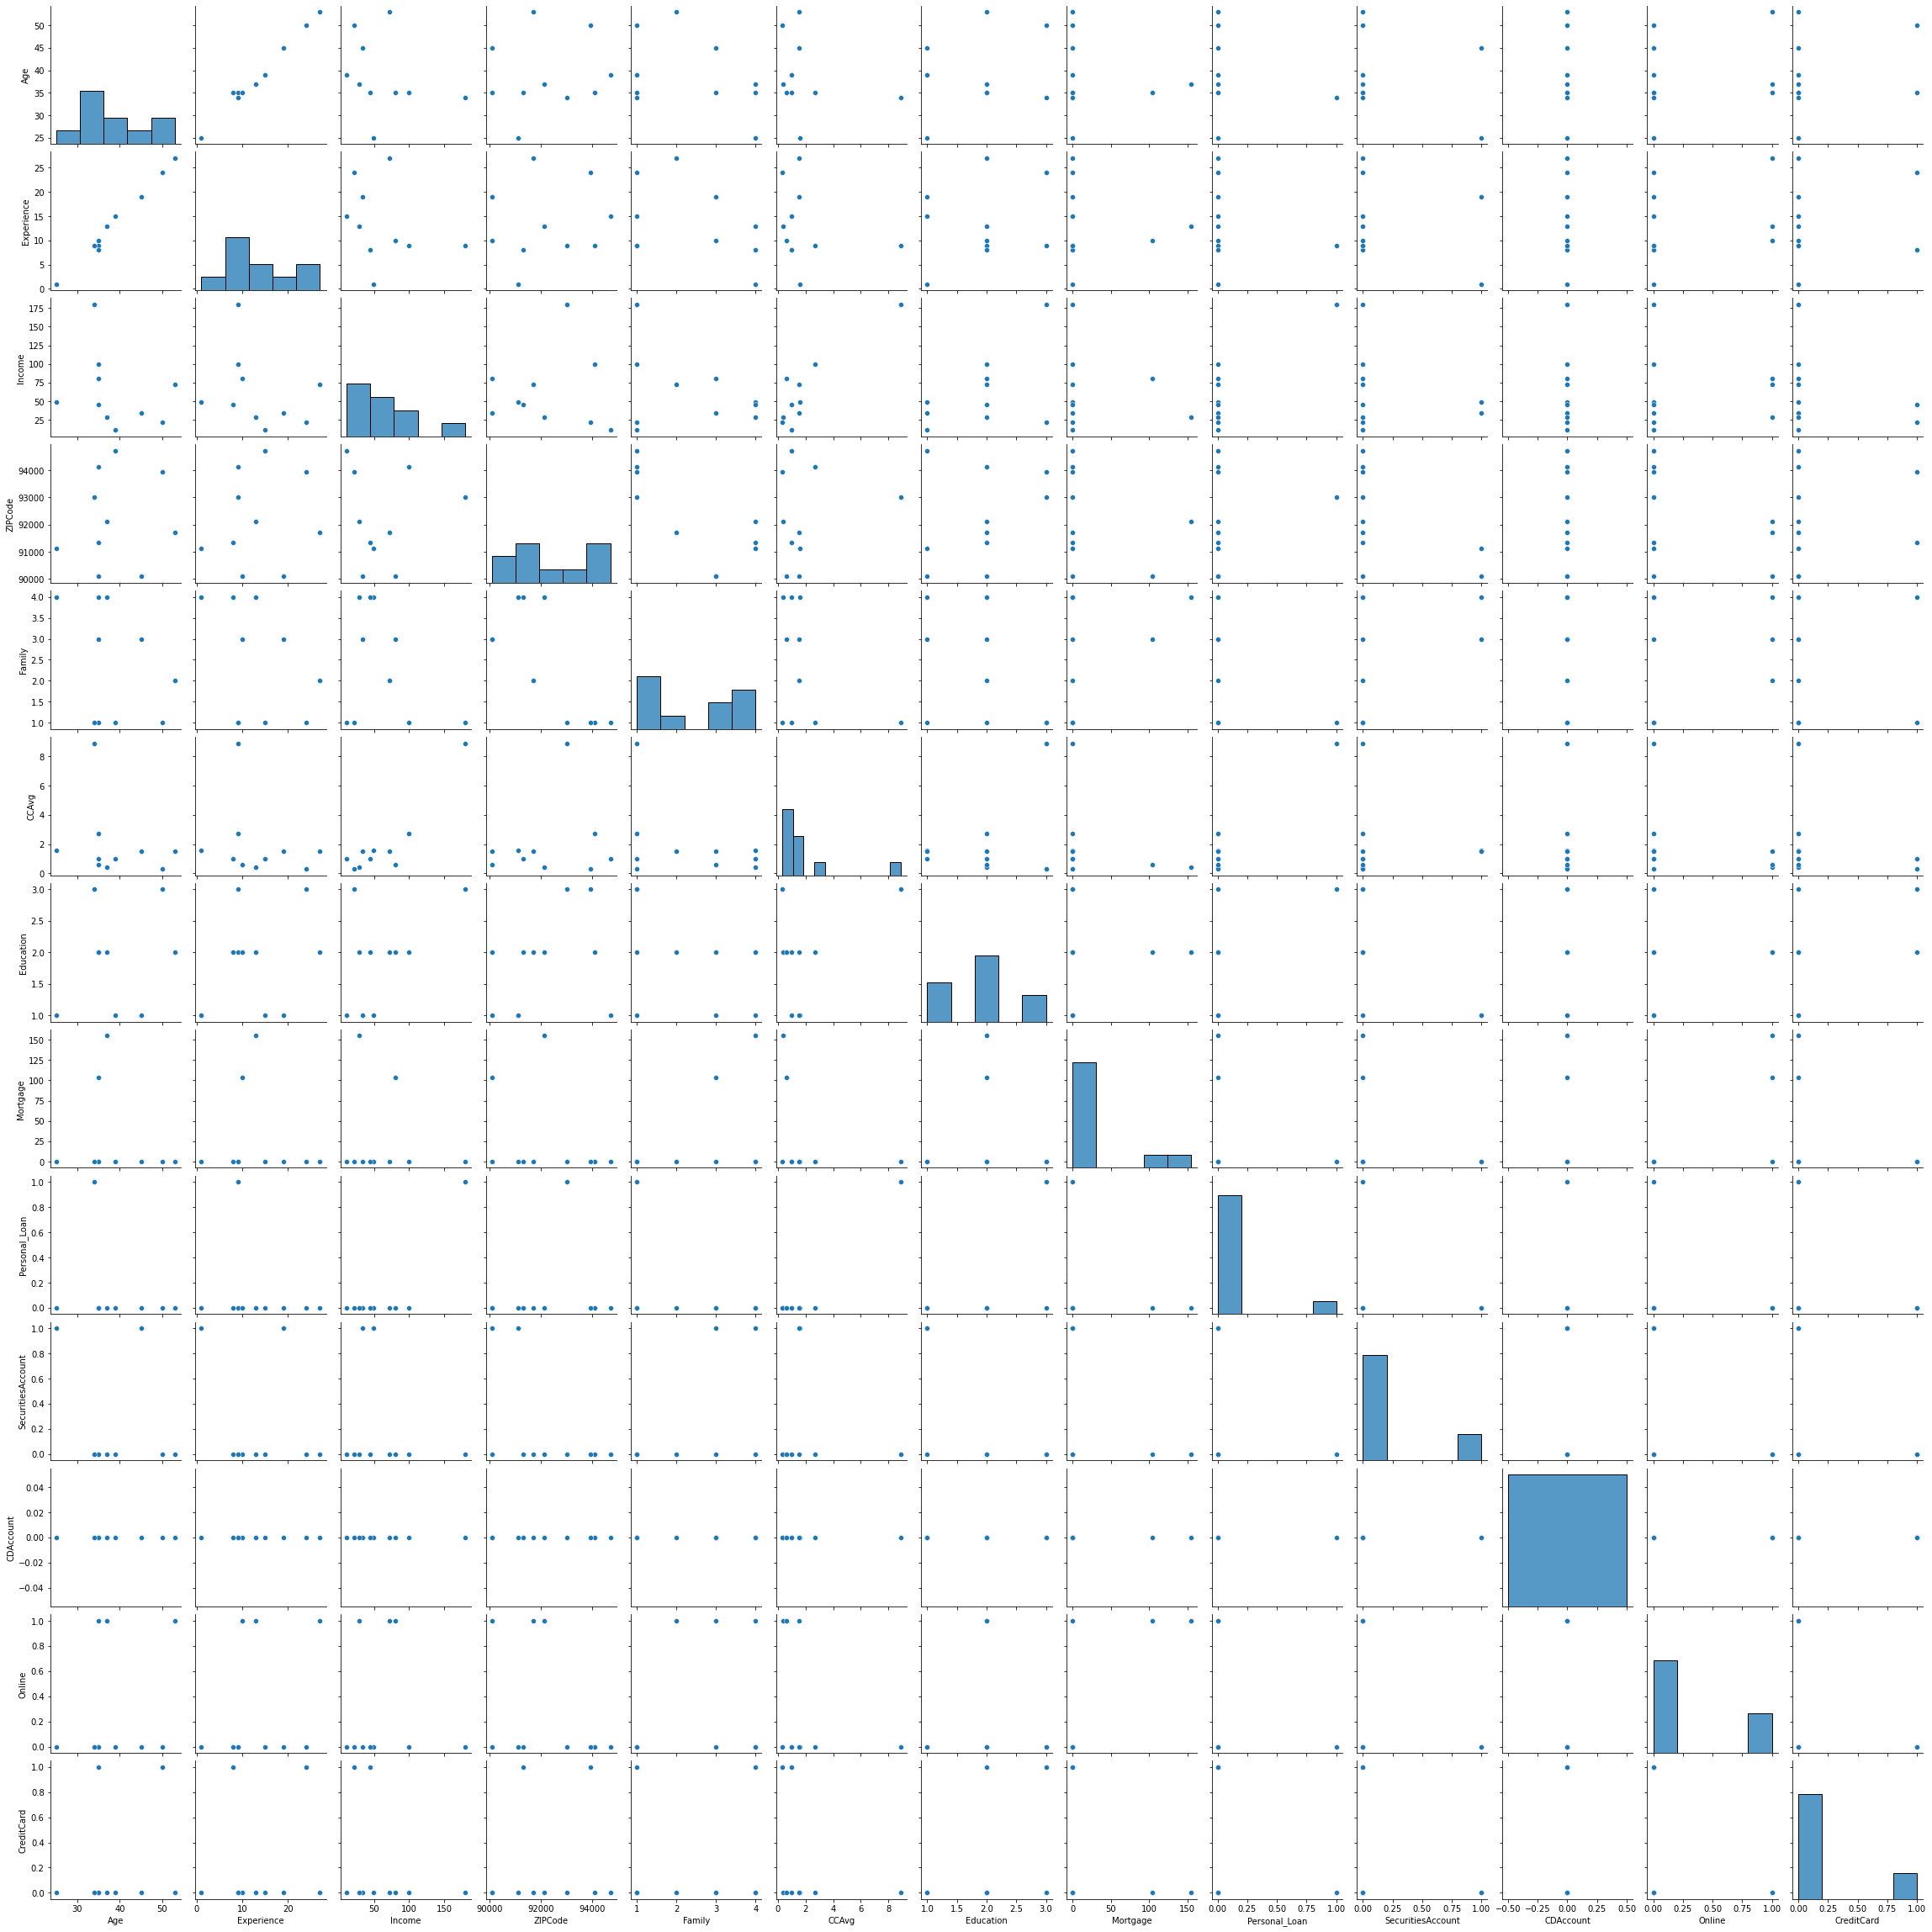

In [ ]:
sns.pairplot(my_data.iloc[:,1:])

In [ ]:
my_data[my_data['Experience'] < 0]['Experience'].count()

0